### Set Up SQL and Pandas
Import the data from factbook.db

In [1]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('factbook.db')

q = '''
SELECT *
FROM sqlite_master
WHERE type = 'table'
;'''

pd.read_sql_query(q,conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
2,table,cities,cities,2,CREATE TABLE cities (\n id integer prim...


In [2]:
q = '''
SELECT *
FROM facts
LIMIT 5
;'''

test = pd.read_sql_query(q, conn)
print(test)

columns = test.columns

print(columns)

   id code         name     area  area_land  area_water  population  \
0   1   af  Afghanistan   652230     652230           0    32564342   
1   2   al      Albania    28748      27398        1350     3029278   
2   3   ag      Algeria  2381741    2381741           0    39542166   
3   4   an      Andorra      468        468           0       85580   
4   5   ao       Angola  1246700    1246700           0    19625353   

   population_growth  birth_rate  death_rate  migration_rate  
0               2.32       38.57       13.89            1.51  
1               0.30       12.92        6.58            3.30  
2               1.84       23.67        4.31            0.92  
3               0.12        8.13        6.96            0.00  
4               2.78       38.78       11.49            0.46  
Index(['id', 'code', 'name', 'area', 'area_land', 'area_water', 'population',
       'population_growth', 'birth_rate', 'death_rate', 'migration_rate'],
      dtype='object')


## Some Summary Statistics

In [3]:
q = '''
SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth)
FROM facts
;'''

pd.read_sql_query(q, conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [4]:
q = '''
SELECT name, population
FROM facts
WHERE population IN (
                     (SELECT MIN(population) FROM facts),
                     (SELECT MAX(population) FROM facts))
;'''

pd.read_sql_query(q, conn)

,name,population
0,Antarctica,0
1,World,7256490011


In [5]:
q = '''
SELECT population, population_growth, birth_rate, death_rate
FROM facts
WHERE population NOT IN (
                         (SELECT MIN(population) FROM facts),
                         (SELECT MAX(population) FROM facts))
;'''

data = pd.read_sql_query(q, conn)
data = data.dropna()
data

,population,population_growth,birth_rate,death_rate
0,32564342,2.32,38.57,13.89
1,3029278,0.30,12.92,6.58
2,39542166,1.84,23.67,4.31
3,85580,0.12,8.13,6.96
4,19625353,2.78,38.78,11.49
5,92436,1.24,15.85,5.69
6,43431886,0.93,16.64,7.33
7,3056382,0.15,13.61,9.34
8,22751014,1.07,12.15,7.14
9,8665550,0.55,9.41,9.42


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0.5,0,'Death Rate in Percent')

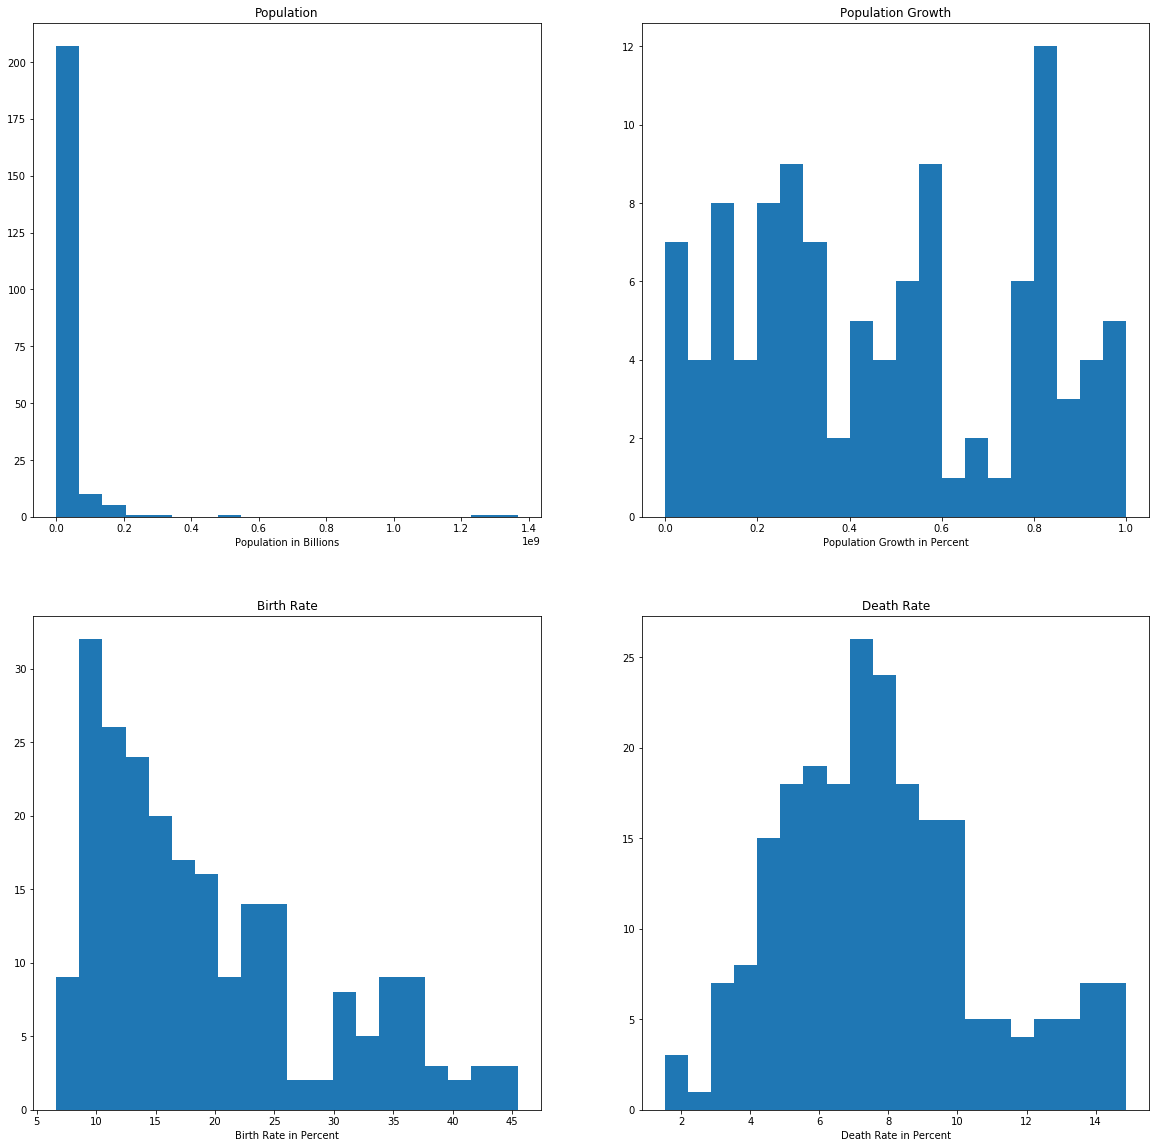

In [7]:
fig = plt.figure(figsize = (20, 20))

ax1 = fig.add_subplot(2, 2, 1)
ax1.hist(data['population'], bins = 20)
ax1.set_title('Population')
ax1.set_xlabel('Population in Billions')

ax2 = fig.add_subplot(2, 2, 2)
ax2.hist(data['population_growth'], bins = 20, range = (0,1))
ax2.set_title('Population Growth')
ax2.set_xlabel('Population Growth in Percent')


ax3 = fig.add_subplot(2, 2, 3)
ax3.hist(data['birth_rate'], bins = 20)
ax3.set_title('Birth Rate')
ax3.set_xlabel('Birth Rate in Percent')


ax4 = fig.add_subplot(2, 2, 4)
ax4.hist(data['death_rate'], bins = 20)
ax4.set_title('Death Rate')
ax4.set_xlabel('Death Rate in Percent')



In [8]:
#Alternate one-line method. Not as nice looking though
#data.hist(column = list(data.columns), layout = (2,2), figsize = (20,20))

In [9]:
q = '''
SELECT *
FROM facts
INNER JOIN cities
ON cities.facts_id = facts.id
LIMIT 10
;'''

pd.read_sql_query(q, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,id,name,population,capital,facts_id
0,216,aa,Aruba,180,180,0,112162,1.33,12.56,8.18,8.92,1,Oranjestad,37000,1,216
1,6,ac,Antigua and Barbuda,442,442,0,92436,1.24,15.85,5.69,2.21,2,Saint John'S,27000,1,6
2,184,ae,United Arab Emirates,83600,83600,0,5779760,2.58,15.43,1.97,12.36,3,Abu Dhabi,942000,1,184
3,184,ae,United Arab Emirates,83600,83600,0,5779760,2.58,15.43,1.97,12.36,4,Dubai,1978000,0,184
4,184,ae,United Arab Emirates,83600,83600,0,5779760,2.58,15.43,1.97,12.36,5,Sharjah,983000,0,184
5,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,6,Kabul,3097000,1,1
6,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,7,Algiers,2916000,1,3
7,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,8,Oran,783000,0,3
8,11,aj,Azerbaijan,86600,82629,3971,9780780,0.96,16.64,7.07,0.00,9,Baku,2123000,1,11
9,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,10,Tirana,419000,1,2


In [10]:
q = '''
SELECT c.*, f.name as country_name
FROM facts as f
INNER JOIN cities as c ON c.facts_id = f.id
LIMIT 5
;'''

pd.read_sql_query(q, conn)

,id,name,population,capital,facts_id,country_name
0,1,Oranjestad,37000,1,216,Aruba
1,2,Saint John'S,27000,1,6,Antigua and Barbuda
2,3,Abu Dhabi,942000,1,184,United Arab Emirates
3,4,Dubai,1978000,0,184,United Arab Emirates
4,5,Sharjah,983000,0,184,United Arab Emirates


In [11]:
q = '''
SELECT f.name country, c.name capital_city
FROM facts f INNER JOIN cities c ON f.id = c.facts_id
WHERE c.capital = 1
;'''

pd.read_sql_query(q, conn)

,country,capital_city
0,Aruba,Oranjestad
1,Antigua and Barbuda,Saint John'S
2,United Arab Emirates,Abu Dhabi
3,Afghanistan,Kabul
4,Algeria,Algiers
5,Azerbaijan,Baku
6,Albania,Tirana
7,Armenia,Yerevan
8,Andorra,Andorra La Vella
9,Angola,Luanda


In [12]:
q = '''
SELECT f.name country, f.population
FROM facts f
LEFT JOIN cities c ON f.id = c.facts_id
WHERE c.name IS Null
;'''

pd.read_sql_query(q, conn)

,country,population
0,Kosovo,1.870981e+06
1,Monaco,3.053500e+04
2,Nauru,9.540000e+03
3,San Marino,3.302000e+04
4,Singapore,5.674472e+06
5,Holy See (Vatican City),8.420000e+02
6,Taiwan,2.341513e+07
7,European Union,5.139494e+08
8,Ashmore and Cartier Islands,NaN
9,Christmas Island,1.530000e+03


In [13]:
q = '''
SELECT c.name capital_city, f.name country, f.population population
FROM facts f INNER JOIN cities c ON c.facts_id = f.id
WHERE c.capital = 1
ORDER BY population DESC
LIMIT 10
;'''

pd.read_sql_query(q, conn)

,capital_city,country,population
0,Beijing,China,1367485388
1,New Delhi,India,1251695584
2,"Washington, D.C.",United States,321368864
3,Jakarta,Indonesia,255993674
4,Brasilia,Brazil,204259812
5,Islamabad,Pakistan,199085847
6,Abuja,Nigeria,181562056
7,Dhaka,Bangladesh,168957745
8,Moscow,Russia,142423773
9,Tokyo,Japan,126919659


In [14]:
q = '''
SELECT c.name capital_city, f.name country, c.population population
FROM facts f INNER JOIN (SELECT *
                         FROM cities
                         WHERE population > 10000000 AND capital = 1) c ON c.facts_id = f.id
ORDER BY population DESC
;'''

pd.read_sql_query(q, conn)

,capital_city,country,population
0,Tokyo,Japan,37217000
1,New Delhi,India,22654000
2,Mexico City,Mexico,20446000
3,Beijing,China,15594000
4,Dhaka,Bangladesh,15391000
5,Buenos Aires,Argentina,13528000
6,Manila,Philippines,11862000
7,Moscow,Russia,11621000
8,Cairo,Egypt,11169000


In [15]:
q = '''
SELECT f.name country, SUM(c.population) urban_pop
                         FROM cities c INNER JOIN facts f ON f.id = c.facts_id
                         GROUP BY country
;'''

pd.read_sql_query(q, conn)

,country,urban_pop
0,Afghanistan,3097000
1,Albania,419000
2,Algeria,3699000
3,American Samoa,64000
4,Andorra,23000
5,Angola,6166000
6,Anguilla,2000
7,Antigua and Barbuda,27000
8,Argentina,18951000
9,Armenia,1116000


In [16]:
q = '''
SELECT sub.country, 
       sub.urban_pop urban_pop,  
       sub.total_pop total_pop, 
       CAST(urban_pop as Float) / CAST(total_pop as Float) urban_pct

FROM facts f INNER JOIN (SELECT f.name country, f.population total_pop, SUM(c.population) urban_pop
                         FROM cities c INNER JOIN facts f ON f.id = c.facts_id
                         GROUP BY country) 
             sub ON f.name = sub.country
             
WHERE urban_pct > 0.5
ORDER BY urban_pct
;'''

pd.read_sql_query(q, conn)

,country,urban_pop,total_pop,urban_pct
0,Uruguay,1672000,3341893,0.500315
1,"Congo, Republic of the",2445000,4755097,0.514185
2,Brunei,241000,429646,0.560927
3,New Caledonia,157000,271615,0.578024
4,Virgin Islands,60000,103574,0.579296
5,Falkland Islands (Islas Malvinas),2000,3361,0.595061
6,Djibouti,496000,828324,0.598800
7,Australia,13789000,22751014,0.606083
8,Iceland,206000,331918,0.620635
9,Israel,5226000,8049314,0.649248
